In [11]:
using LinearAlgebra, Interpolations, Statistics, CSV, DataFrames, Plots

## Redshift Assignment to 536 FRBs from CHIME

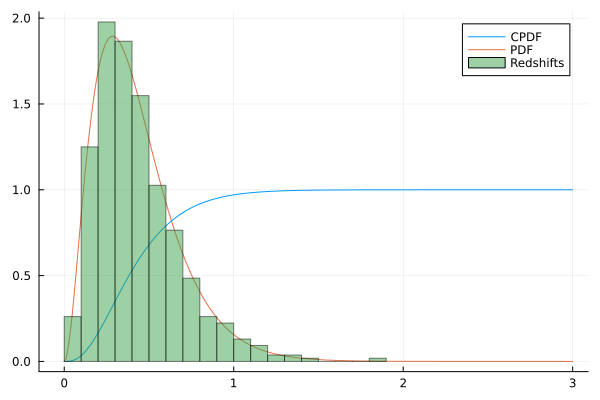

In [38]:
function galaxy_dist(z; α = 7)
    return (α^3 / 2) * z^2 * exp(-α * z)
end

function cpdf_galaxy_dist(z; α = 7)
    return 1 - (exp(-α * z)/2)*(α^2*z^2 + 2*α*z + 2)
end

z_vals = 0:0.01:3
cpdf_vals = cpdf_galaxy_dist.(z_vals)

chimefrbs = CSV.read("chimefrbcat.csv", DataFrame)
redshift_vals = zeros(length(chimefrbs[:, 1]))
for i in 1:length(redshift_vals)
    interp_linear = linear_interpolation(cpdf_vals, z_vals)
    redshift_vals[i] = interp_linear(rand())
end

chimefrbs.redshift = redshift_vals
# CSV.write("chimefrbcat.csv", chimefrbs)

plot(z_vals, cpdf_vals, label = "CPDF")
plot!(z_vals, galaxy_dist.(z_vals), label = "PDF")
histogram!(chimefrbs.redshift, label = "Redshifts", normed = true, alpha = 0.5, bins = 20)
